Dans ce script, nous allons tester différents modèles de type convolution Nelle pour examiner leur performance. Nous allons ensuite tester s'ils sont robustes lorsqu'on applique une rotation à l'image d'entrée.

In [ ]:
import retinoto_py as fovea
# args = fovea.Params(do_mask=True, n_train_stop=200_000, n_val_stop=10_000, in_memory=True)
# args = fovea.Params(do_mask=True, n_train_stop=0, n_val_stop=0, batch_size=64, in_memory=False)
args = fovea.Params(do_mask=True, n_train_stop=0, n_val_stop=0, num_epochs=5)
args

Welcome on macOS-26.1-arm64-arm-64bit-Mach-O	- Timestamp (UTC)  2025-12-05_05-52-32	 user laurent	Running on MPS device (Apple Silicon/MacOS)	 - macos_version = 26.1	 with device mps, pytorch==2.9.1
Random seed 2018 has been set.


Params(image_size=224, do_mask=True, do_fovea=False, rs_min=0.0, rs_max=-6.0, padding_mode='zeros', seed=2018, batch_size=80, num_workers=1, in_memory=False, model_name='convnext_base', num_epochs=4, n_train_stop=0, n_val_stop=0, lr=1e-06, delta1=0.1, delta2=0.007, weight_decay=0.03, label_smoothing=0.2, shuffle=True, verbose=True)

# transfer learning of each network on the  masked dataset

In [2]:
%ls -ltr cached_data/20*

-rw-r--r--@ 1 laurent  staff  354499245  5 déc.  06:38 cached_data/20_model_name=convnext_base_dataset=bbox.pth
-rw-r--r--@ 1 laurent  staff        759  5 déc.  06:38 cached_data/20_model_name=convnext_base_dataset=bbox.json


In [3]:
# %rm "cached_data/20_mls -ltrodel_name=convnext_base_dataset=bbox.lock"   # FORCING RECOMPUTE
# %rm "cached_data/20_*.lock"   # FORCING RECOMPUTE
# %rm "cached_data/20_model_name=resnet101_dataset=full.lock"   # FORCING RECOMPUTE


In [4]:
model_name = args.model_name
for dataset in ['bbox']: # fovea.all_datasets:
    name = f'20_model_name={model_name}_dataset={dataset}'
    model_filename, json_filename = fovea.do_learning(args, dataset, name)
    print(50*'.')

Load JSON from pre-trained resnet cached_data/20_model_name=convnext_base_dataset=bbox.json
cached_data/20_model_name=convnext_base_dataset=bbox.pth: accuracy = 0.811
..................................................


## Model comparison

TODO Faire un nouveau notebook 23_

In [6]:
model_name = args.model_name
for dataset in ['bbox']: # fovea.all_datasets:
    results = fovea.pd.read_json(args.data_cache / f'20_model_name={model_name}_dataset={dataset}.json')
    print(model_name, dataset, results.tail(1)['acc_val'])

convnext_base bbox 3    0.813644
Name: acc_val, dtype: float64


In [9]:
results.T

,0,1,2,3
epoch,0.000000,1.000000e+00,2.000000e+00,3.000000e+00
i_image,615280.000000,6.152800e+05,6.152800e+05,6.152800e+05
total_image,615280.000000,1.230560e+06,1.845840e+06,2.461120e+06
loss_train,2.122802,2.093896e+00,2.084253e+00,2.077628e+00
acc_train,0.926996,9.332857e-01,9.356634e-01,9.371977e-01
acc_val,0.806965,8.102736e-01,8.120398e-01,8.136443e-01
time,7059.062819,1.410944e+04,2.116042e+04,2.820790e+04


In [7]:
results_13 = fovea.pd.read_json(args.data_cache / '13_model_comparison.json')
results_13

,model_name,do_mask,dataset,accuracy,wall_clock_time,total_parameters,trainable_parameters,total_layers
0,resnet18,True,full,0.515400,0.003884,11689512,11689512,68
1,resnet50,True,full,0.788860,0.005536,25557032,25557032,151
2,resnet101,True,full,0.801120,0.007081,44549160,44549160,287
3,resnet18,True,bbox,0.430846,0.004722,11689512,11689512,68
4,resnet50,True,bbox,0.721915,0.006415,25557032,25557032,151
5,resnet101,True,bbox,0.751393,0.007409,44549160,44549160,287
6,resnet18,False,full,0.691620,0.004008,11689512,11689512,68
7,resnet50,False,full,0.807600,0.005385,25557032,25557032,151
8,resnet101,False,full,0.817300,0.007105,44549160,44549160,287
9,resnet18,False,bbox,0.627786,0.004341,11689512,11689512,68


## Plot learning evolution

Load JSON from pre-trained resnet cached_data/20_model_name=convnext_base_dataset=bbox.json
cached_data/20_model_name=convnext_base_dataset=bbox.pth: accuracy = 0.811


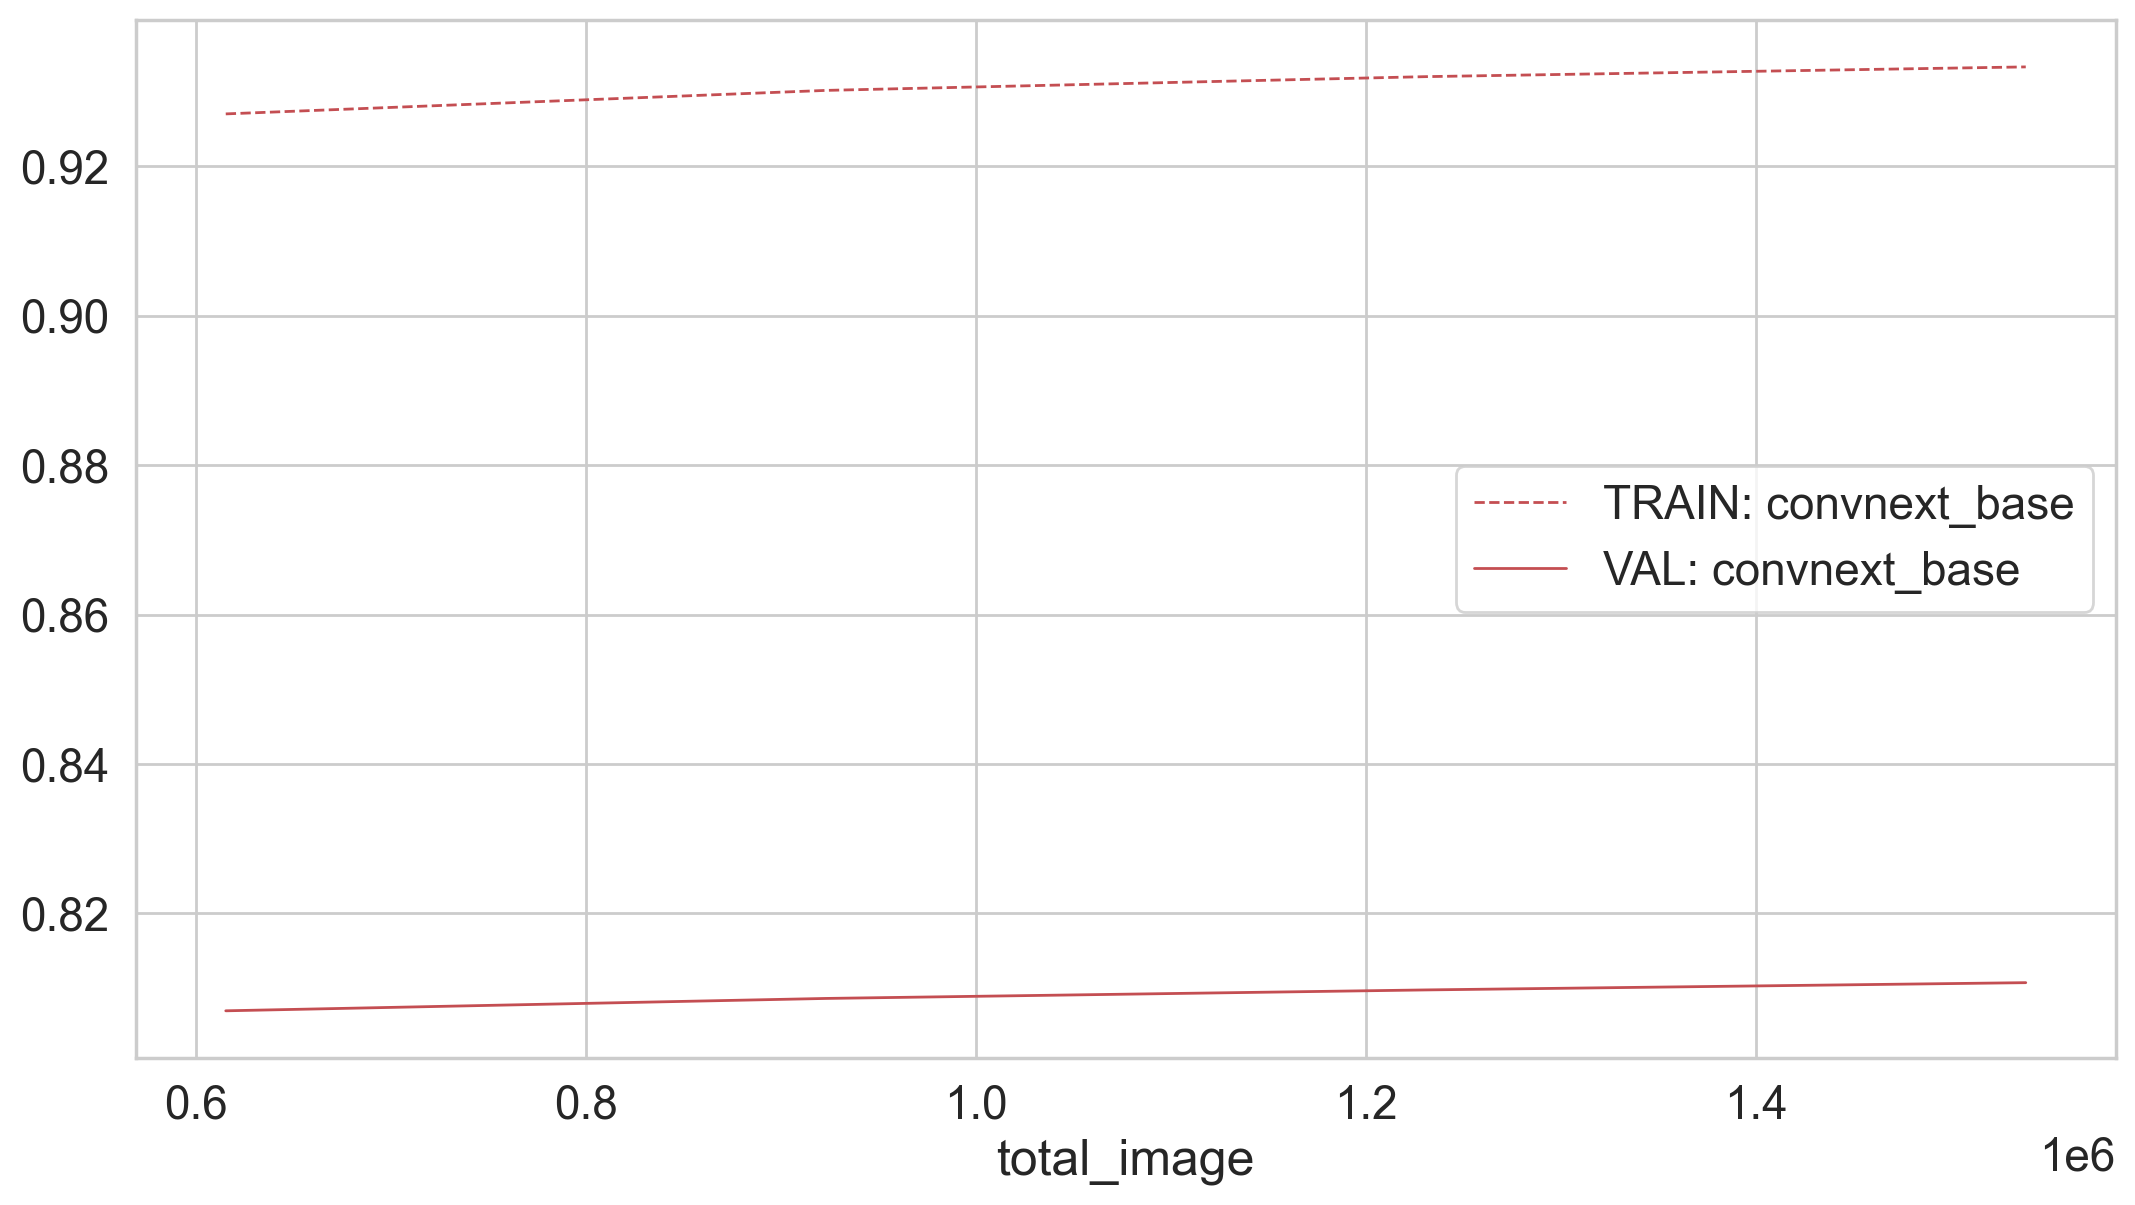

In [8]:
fig, ax = fovea.plt.subplots()
for dataset in ['bbox']: # fovea.all_datasets:
    color = 'r'
    lw = 1

    name = f'20_model_name={model_name}_dataset={dataset}'
    model_filename, json_filename = fovea.do_learning(args, dataset, name)

    df_train = fovea.pd.read_json(json_filename, orient='records')

    df_train_roll = df_train.rolling(window=5, min_periods=1, center=False).mean()
    ax = df_train_roll.plot(x='total_image', y='acc_train', 
                        c=color, ls='dashed', lw=lw,
                        grid=True, ax=ax, label='TRAIN: ' + args.model_name)    
    ax = df_train_roll.plot(x='total_image', y='acc_val', 
                        c=color, lw=lw,
                        grid=True, ax=ax, label='VAL: ' + args.model_name)   

In [ ]:
df_train